# 모델 성능 시각화 

- last_model 기준
- f1-score 

In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [75]:
df = pd.read_csv("./data/scores.csv")

In [77]:
df

,aspect,ACD_P,ACD_R,ACD_F1,Support,Label,Polarity_P,Polarity_R,Polarity_F1
0,가격,0.9333,0.9333,0.9333,15,7_train,0.6000,0.5625,0.5806
1,거품,1.0000,1.0000,1.0000,52,7_train,0.7308,0.7308,0.7308
2,기타,0.0000,0.0000,0.0000,22,7_train,0.0000,0.0000,0.0000
3,세정,0.8194,0.8939,0.8551,66,7_train,0.6667,0.7164,0.6906
4,없음,0.1500,0.7500,0.2500,4,7_train,0.7500,0.1500,0.2500
5,일반,0.2500,0.0357,0.0625,28,7_train,0.2500,0.0357,0.0625
6,자극,0.8947,0.8947,0.8947,19,7_train,0.7895,0.7500,0.7692
7,향,0.8933,0.9853,0.9371,68,7_train,0.6800,0.7183,0.6986
8,가격,0.9200,0.9583,0.9388,24,8_train,0.6800,0.7083,0.6939
9,거품,1.0000,1.0000,1.0000,101,8_train,0.8020,0.8020,0.8020


---
## Aspect별 ACD & ABSA F1-score 비교 

In [79]:
df1 = df[df["Label"] == "last_aug"]
df1

,aspect,ACD_P,ACD_R,ACD_F1,Support,Label,Polarity_P,Polarity_R,Polarity_F1
35,가격,1.0000,0.9583,0.9787,24,last_aug,0.9565,0.9167,0.9362
36,거품,1.0000,0.9901,0.9950,101,last_aug,0.9800,0.9703,0.9751
37,머릿결,0.9630,1.0000,0.9811,52,last_aug,0.9074,0.9423,0.9245
38,세정,0.9746,0.9664,0.9705,119,last_aug,0.9661,0.9580,0.9620
39,없음,0.0000,0.0000,0.0000,0,last_aug,0.0000,0.0000,0.0000
40,자극,0.9268,0.9500,0.9383,40,last_aug,0.9024,0.9024,0.9024
41,쿨링,1.0000,1.0000,1.0000,14,last_aug,1.0000,1.0000,1.0000
42,탈모,0.9091,0.8333,0.8696,24,last_aug,0.8636,0.7917,0.8261
43,향,0.9695,0.9922,0.9807,128,last_aug,0.9313,0.9313,0.9313


In [81]:
df1 = df1[["aspect", "ACD_F1", "Polarity_F1"]]
df1 = df1[df1["aspect"] != "없음"]
df1

,aspect,ACD_F1,Polarity_F1
35,가격,0.9787,0.9362
36,거품,0.9950,0.9751
37,머릿결,0.9811,0.9245
38,세정,0.9705,0.9620
40,자극,0.9383,0.9024
41,쿨링,1.0000,1.0000
42,탈모,0.8696,0.8261
43,향,0.9807,0.9313


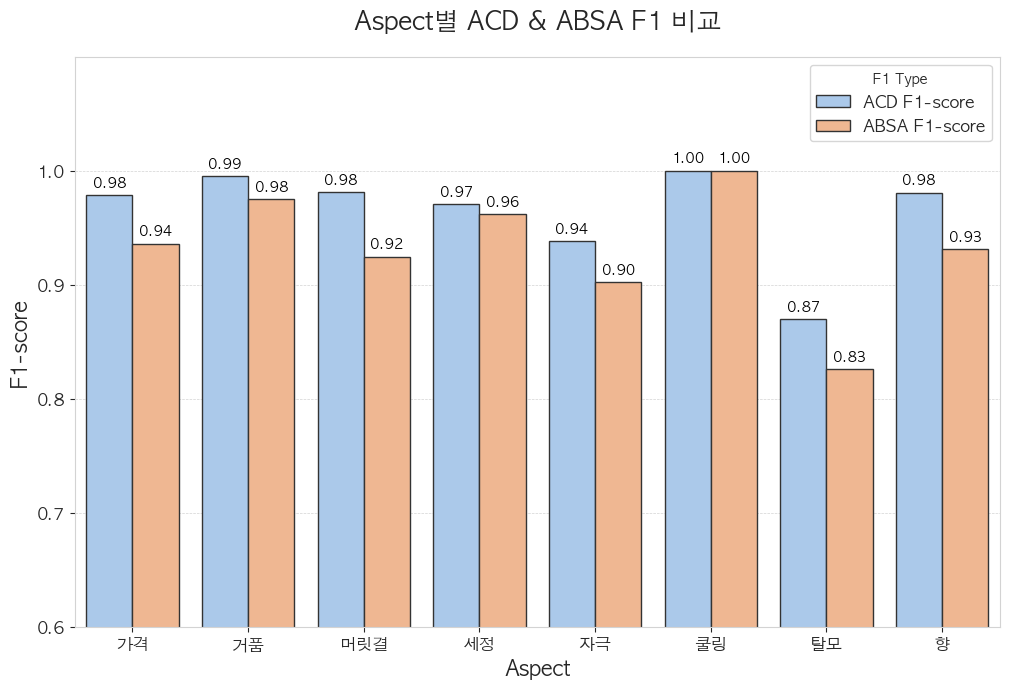

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False 

plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgray' 
plt.rcParams['grid.linestyle'] = '--' 
plt.rcParams['grid.linewidth'] = 0.5 
plt.rcParams['axes.edgecolor'] = 'lightgray' 
plt.rcParams['axes.linewidth'] = 0.8 
plt.rcParams['xtick.bottom'] = True 
plt.rcParams['ytick.left'] = True 

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 7

plt.figure(figsize=(12, 7)) 

df1_melted = df1.melt(id_vars='aspect', var_name='F1_Type', value_name='F1_Score')

barplot = sns.barplot(
    x="aspect",
    y="F1_Score",
    hue="F1_Type",
    data=df1_melted,
    palette="pastel",
    edgecolor=".2"
)

plt.title("Aspect별 ACD & ABSA F1 비교", fontsize=18, pad=20)
plt.xlabel("Aspect", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.ylim(0.6, 1.1)
plt.yticks(np.arange(0.6, 1.01, 0.1))

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 9), 
        textcoords = 'offset points',
        fontsize=10,
        color='black'
    )

handles, _ = barplot.get_legend_handles_labels()
new_labels = ['ACD F1-score', 'ABSA F1-score']
plt.legend(title="F1 Type", loc='upper right', handles=handles, labels=new_labels) 
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig('./f1_bar.png', transparent=True, dpi=300, bbox_inches='tight')

plt.show()

---
## 전체 ACD & ABSA F1-score

In [85]:
df2 = df[df["aspect"] == "머릿결"]
df2

,aspect,ACD_P,ACD_R,ACD_F1,Support,Label,Polarity_P,Polarity_R,Polarity_F1
10,머릿결,0.7183,0.9808,0.8293,52,8_train,0.5352,0.7308,0.6179
19,머릿결,0.7647,1.0000,0.8667,52,10_train,0.6324,0.8269,0.7167
28,머릿결,0.9123,1.0000,0.9541,52,10_aug,0.8772,0.9615,0.9174
37,머릿결,0.9630,1.0000,0.9811,52,last_aug,0.9074,0.9423,0.9245


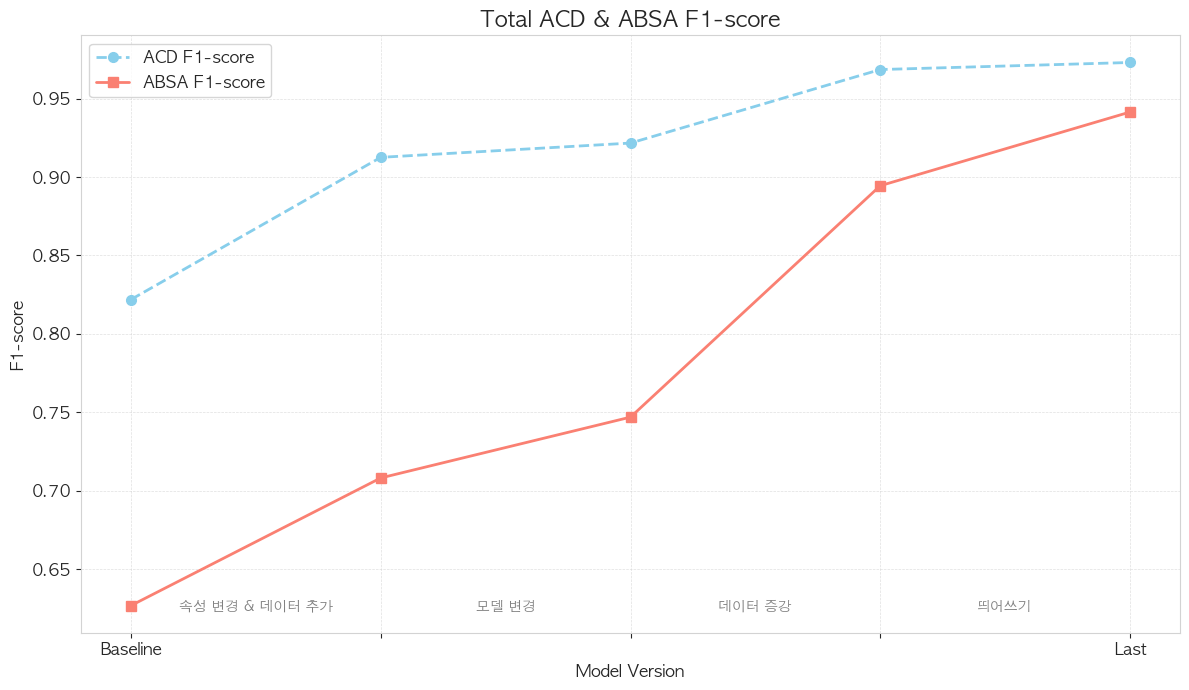

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

fm.findfont(fm.FontProperties(family='AppleGothic'))
plt.rcParams['font.family'] = 'AppleGothic'

f1_acd_performance = [0.8219, 0.9126, 0.9217, 0.9686, 0.9731]
pipeline_performance = [0.6267, 0.7081, 0.7469, 0.8945, 0.9415]

x_labels = ['Baseline', '', '', '', 'Last']
x_positions = np.arange(len(x_labels))

mid_point_labels = {
    (0, 1): '속성 변경 & 데이터 추가',
    (1, 2): '모델 변경',
    (2, 3): '데이터 증강',
    (3, 4): '띄어쓰기'
}

plt.figure(figsize=(12, 7))

plt.plot(x_positions, f1_acd_performance, marker='o', linestyle='--', color='skyblue', label='ACD F1-score')
plt.plot(x_positions, pipeline_performance, marker='s', linestyle='-', color='salmon', label='ABSA F1-score')

plt.xticks(x_positions, x_labels, fontsize=12)
plt.xlabel("Model Version", fontsize=12)
plt.ylabel("F1-score", fontsize=12)
plt.title("Total ACD & ABSA F1-score", fontsize=16)

for (start_idx, end_idx), label in mid_point_labels.items():
    mid_x = (x_positions[start_idx] + x_positions[end_idx]) / 2
    plt.text(mid_x, plt.ylim()[0] * 1.02, label, ha='center', va='bottom', fontsize=10, rotation=0, color='gray') # y축 최저점 아래에 위치

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('./f1_전체.png', transparent=True)

plt.show()

---
## Aspect 개별 ACD & ABSA F1-score

- 세정, 자극, 거품, 향, 가격 

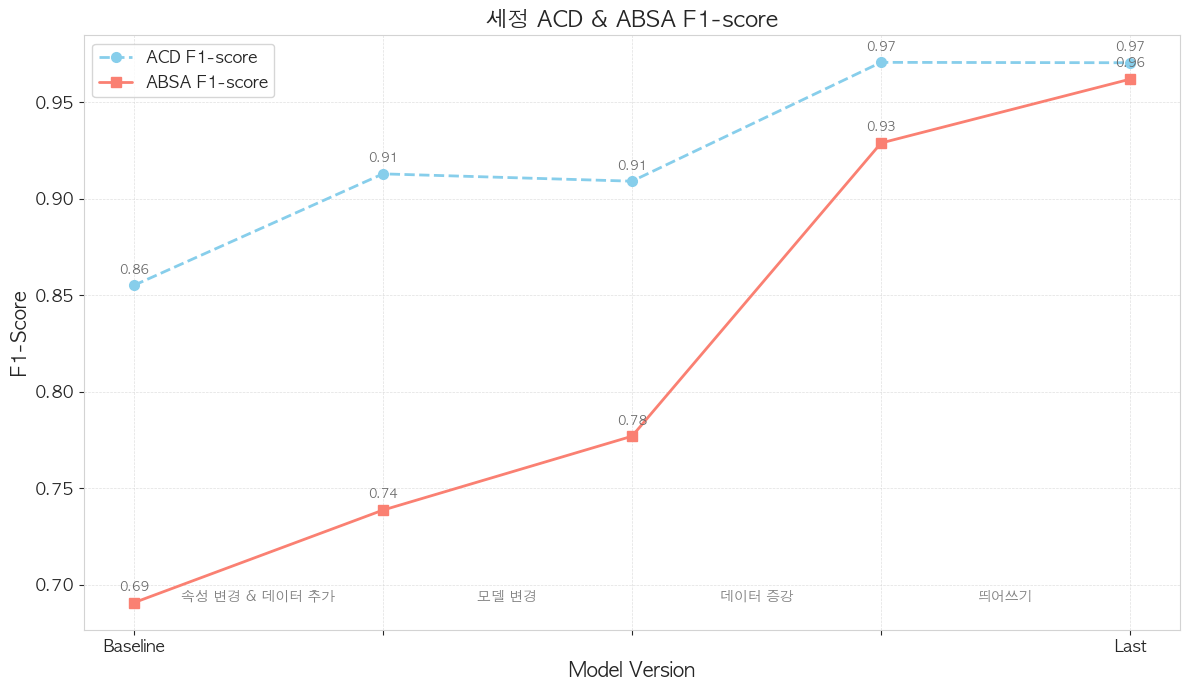

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

fm.findfont(fm.FontProperties(family='AppleGothic'))
plt.rcParams['font.family'] = 'AppleGothic'

x_labels = ['Baseline', '', '', '', 'Last']
x_positions = np.arange(len(x_labels))

mid_point_labels = {
    (0, 1): '속성 변경 & 데이터 추가',
    (1, 2): '모델 변경',
    (2, 3): '데이터 증강',
    (3, 4): '띄어쓰기'
}

aspect = "세정"
sub_df = df[df["aspect"] == aspect]
y1 = sub_df["ACD_F1"].tolist()
y2 = sub_df["Polarity_F1"].tolist()

n = len(y1)
x_positions = np.arange(n)
x_labels = ['Baseline', '', '', '', 'Last'][:n]

plt.figure(figsize=(12, 7))

plt.plot(x_positions, y1, marker='o', linestyle='--', color='skyblue', linewidth=2, label='ACD F1-score')
plt.plot(x_positions, y2, marker='s', linestyle='-', color='salmon', linewidth=2, label='ABSA F1-score')

plt.xlabel("Model Version", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.title(f"{aspect} ACD & ABSA F1-score", fontsize=16)
plt.xticks(x_positions, x_labels, fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(y1):
    plt.text(x_positions[i], v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9, color='dimgray')
for i, v in enumerate(y2):
    plt.text(x_positions[i], v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9, color='dimgray')

for (start_idx, end_idx), label in mid_point_labels.items():
    if end_idx < n:
        mid_x = (x_positions[start_idx] + x_positions[end_idx]) / 2
        plt.text(mid_x, plt.ylim()[0] * 1.02, label, ha='center', va='bottom', fontsize=10, rotation=0, color='gray')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig(f'./f1_{aspect}.png')

plt.show()

---
## Aspect 개별 ACD & ABSA F1-score

- 속성 변경 때 추가된 속성들
    - 탈모, 쿨링, 머릿결 

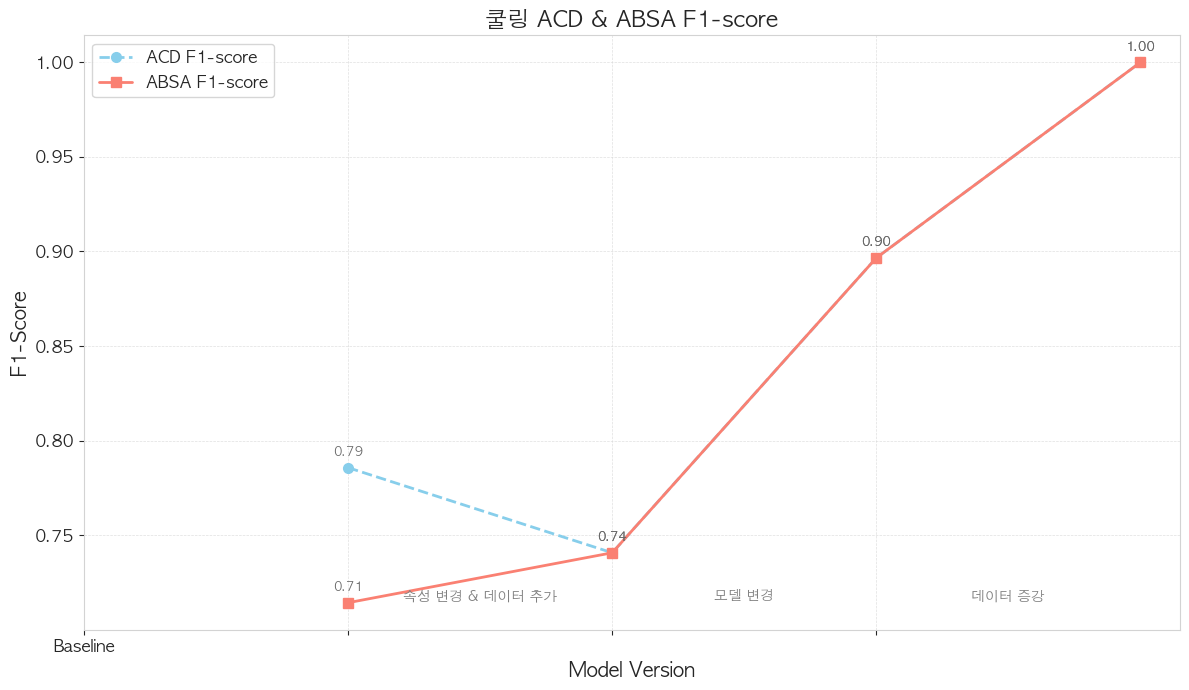

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

fm.findfont(fm.FontProperties(family='AppleGothic'))
plt.rcParams['font.family'] = 'AppleGothic'

x_labels = ['Baseline', '', '', '', 'Last']
x_positions = np.arange(len(x_labels))

mid_point_labels = {
    (0, 1): '속성 변경 & 데이터 추가',
    (1, 2): '모델 변경',
    (2, 3): '데이터 증강',
    (3, 4): '띄어쓰기'
}

aspect = "쿨링"
sub_df = df[df["aspect"] == aspect]
y1 = sub_df["ACD_F1"].tolist()
y2 = sub_df["Polarity_F1"].tolist()

n = len(y1)
x_positions = np.arange(n)
x_labels = ['Baseline', '', '', '', 'Last'][:n]

x_shifted = x_positions + 1

plt.figure(figsize=(12, 7))

plt.plot(x_shifted, y1, marker='o', linestyle='--', color='skyblue', linewidth=2, label='ACD F1-score')
plt.plot(x_shifted, y2, marker='s', linestyle='-', color='salmon', linewidth=2, label='ABSA F1-score')

plt.xlabel("Model Version", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.title(f"{aspect} ACD & ABSA F1-score", fontsize=16)
plt.xticks(x_positions, x_labels, fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(y1):
    plt.text(x_shifted[i], v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9, color='dimgray')
for i, v in enumerate(y2):
    plt.text(x_shifted[i], v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9, color='dimgray')

for (start_idx, end_idx), label in mid_point_labels.items():
    if end_idx < n:
        mid_x = (x_shifted[start_idx] + x_shifted[end_idx]) / 2
        plt.text(mid_x, plt.ylim()[0] * 1.02, label, ha='center', va='bottom', fontsize=10, rotation=0, color='gray')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig(f'./f1_{aspect}.png')

plt.show()